In [22]:
import tensorflow as tf
import numpy as np
import cv2
import os
import glob
import time
import datetime
import logging
import shutil
import boto3
import botocore
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
PIXEL = 56
COLOR = 3

if COLOR is 3:
    Gray = False
elif COLOR is 1:
    Gray = True
else:
    logger.error('COLOR has to be 1 or 3')
home = os.getcwd().split('AUT-CNN-TUB')[0]
test_path  = os.path.join(home,'AUT-CNN-TUB/Data/TF_Images_final_{}/test/'.format(PIXEL))
train_path = os.path.join(home,'AUT-CNN-TUB/Data/TF_Images_final_{}/train/'.format(PIXEL))
val_path = os.path.join(home,'AUT-CNN-TUB/Data/TF_Images_final_{}/validate'.format(PIXEL))

test_number = len(os.listdir(test_path))
train_number = len(os.listdir(train_path))
val_number =  len(os.listdir(val_path))

In [17]:
class DataGetter:
    def __init__(self, path, GRBtoGray=False, flatten=False): 
        self.path  = path
        self.GRBtoGray  = GRBtoGray
        self.flatten  = flatten
        self.batchindices = None
        
        self.data_path = os.path.join(self.path, '*g') 
        self.files = glob.glob(self.data_path)
        self.num_imag = len(self.files)
        self.Data = list(range(0, self.num_imag))

    def get_batch(self,size):
        
        if len(self.Data) > size:
            self.batchindices = list(np.random.choice(self.Data, size=size, replace=False))
            for x in self.batchindices:
                self.Data.remove(x) 
                
        elif len(self.Data) == size: # new epoche
            self.batchindices = np.random.choice(self.Data, size=size, replace=False)  
            self.Data = list(range(0, self.num_imag))

            
        else: # new epoche
            self.batchindices = np.random.choice(self.Data, size=len(self.Data), replace=False)  
            self.Data = list(range(0, self.num_imag))



            

        label_list =[]
        img_list = []
        file_name_list = []
        for i, file_path in enumerate(self.files):
            if i in self.batchindices:
                label_str = file_path.split('/')[-1][:4]
                label_bin = label_to_binary(position_dict, label_str)

                if self.GRBtoGray == True:
                    img = cv2.imread(file_path, flags=0)
                else:
                    img = cv2.imread(file_path, flags=1)

                if self.flatten == True:
                    img_list.append(img.flatten())
                    label_list.append(label_bin)
                    file_name_list.append(file_path.split('/')[-1])
                else:
                    img_list.append(img)
                    label_list.append(label_bin)
                    file_name_list.append(file_path.split('/')[-1])

        img_list = np.array(img_list)
        label_list = np.array(label_list)


        return img_list, label_list, file_name_list
    
test_img = DataGetter(test_path, Gray, False)
train_img = DataGetter(train_path, Gray, False)
val_img = DataGetter(val_path, Gray, False)


In [18]:
train_number = len(os.listdir(train_path))

labels = ['01.0', '02.0', '03.0', '04.0', '05.0', '06.0', '07.1', '07.2',
         '08.0', '09.0','10.0','11.0', '12.0','13.0','14.0', '15.0']

position_dict = {k: v for v, k in enumerate(labels)}
label_dict = {v : k  for v, k in enumerate(labels)}

def label_to_binary(position_dict, label):
    z = np.zeros(len(position_dict), dtype=int)
    z[position_dict[label]] = 1
    return z

In [19]:

img_list = []
label_list = []
file_name_list = []

for file_path in glob.glob(os.path.join(train_path, '*g')):
    img = cv2.imread(file_path)
    label_str = file_path.split('/')[-1][:4]
    label_bin = label_to_binary(position_dict, label_str)

    img_list.append(img)
    label_list.append(label_bin)
    file_name_list.append(file_path.split('/')[-1])


In [11]:
len(img_list)

30455

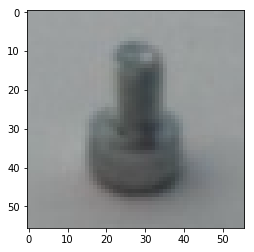

In [26]:
plt.imshow(img_list[1])
plt.show()